# Display on Map

In the dataset of houses in China, the geographic coordinates of each house are available. we can plot the houses based on their locations and analyze the map. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
housing_extended.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


In [28]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

With the latitude and longitude of the houses, we can use a scatter plot to display the houses on a map and observe their relative positions. 


Text(0.5, 1.0, 'scatter plot')

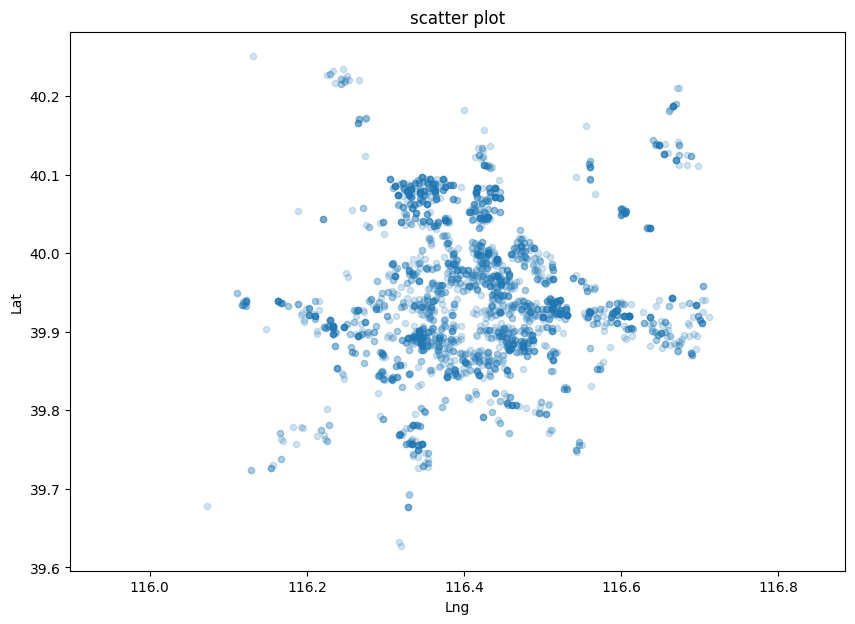

In [29]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax1, kind='scatter', alpha=0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

As you can see, most of the houses are clustered at a single point, which corresponds to the center of Beijing.

(np.float64(116.04057284999999),
 np.float64(116.74327815),
 np.float64(39.5958495),
 np.float64(40.281820499999995))

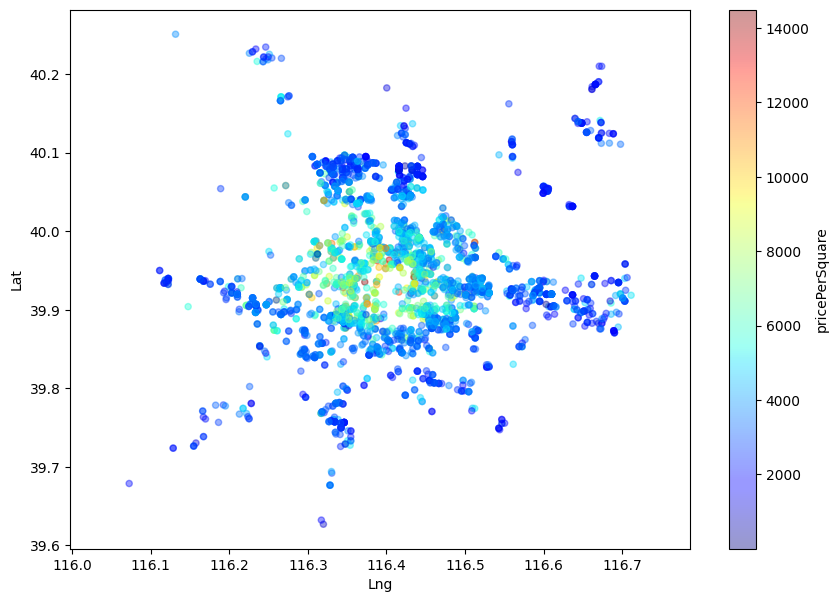

In [30]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax2.axis('equal')

The above chart shows that the most expensive houses (based on price per square meter) are located near the city center, and how the prices decrease as you move away from the city center.


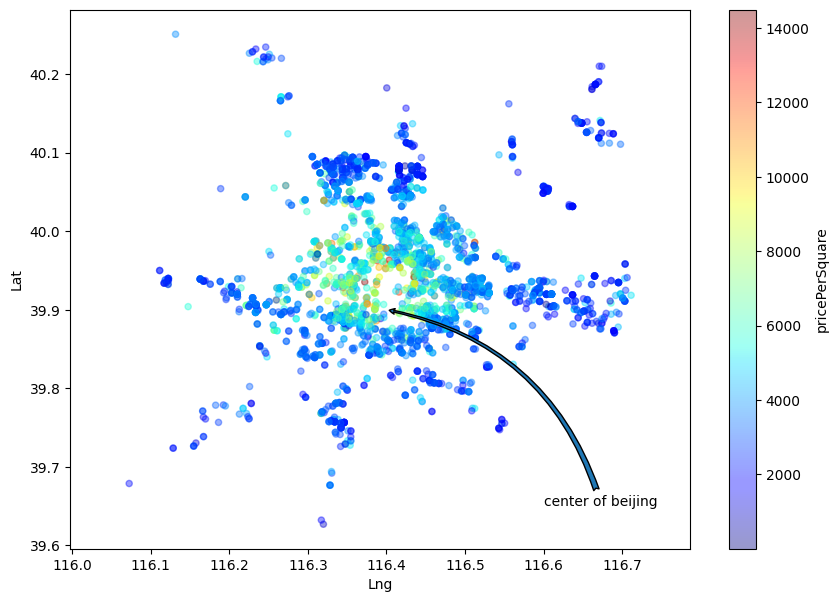

In [ ]:
from matplotlib.patches import ConnectionStyle
connectionstyle = ConnectionStyle("Arc3", rad=0.3)
ax2.annotate('center of beijing',xycoords='data',
            xy=(116.40,39.90),
            xytext=(116.6,39.65), textcoords='data',arrowprops=dict(arrowstyle="fancy",
                            connectionstyle=connectionstyle))
#ax2.annotate()
fig2

In [32]:
ax2.texts

<Axes.ArtistList of 1 texts>

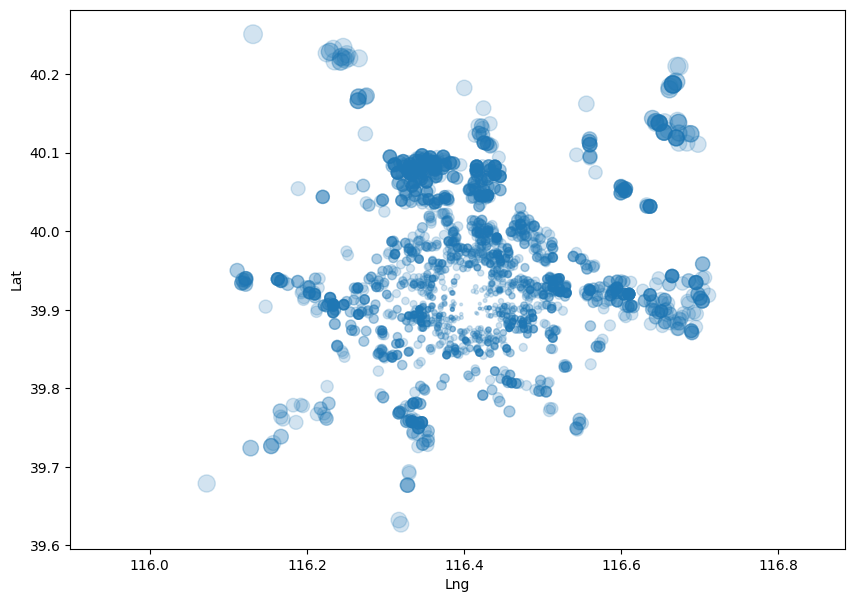

In [33]:
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.2,\
    s = housing_sample['distanceToCapital'] * 4)

ax3.axis('equal');

The above figure shows that all points have the same color, but their sizes are determined based on the distance of each house from the city center. The larger the distance, the bigger the points appear on the chart.

You can place an image of the region behind the plotted points to get a more realistic view of the house locations. Using the horizontal and vertical axis ranges of the plot, we obtained the desired region from Google Maps.

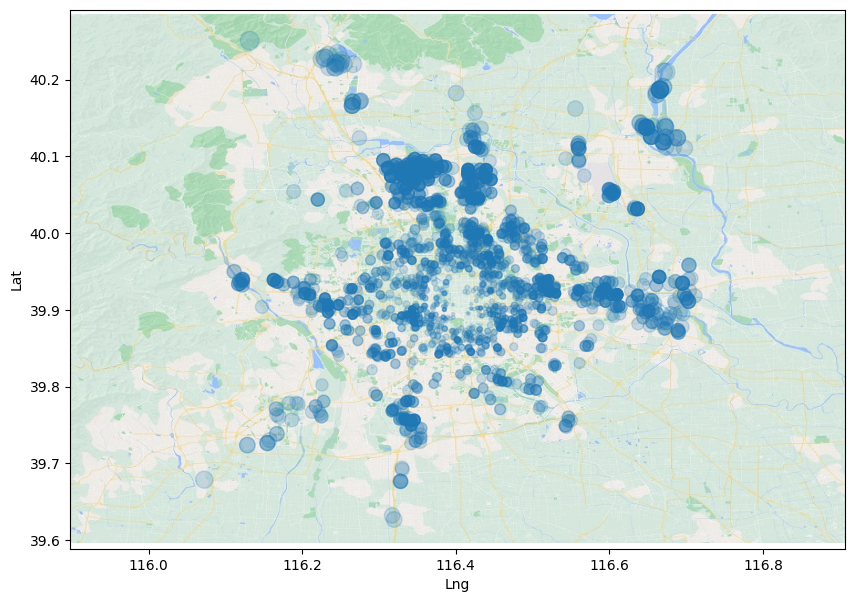

In [34]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig3

(np.float64(116.04057284999999),
 np.float64(116.74327815),
 np.float64(39.5958495),
 np.float64(40.281820499999995))

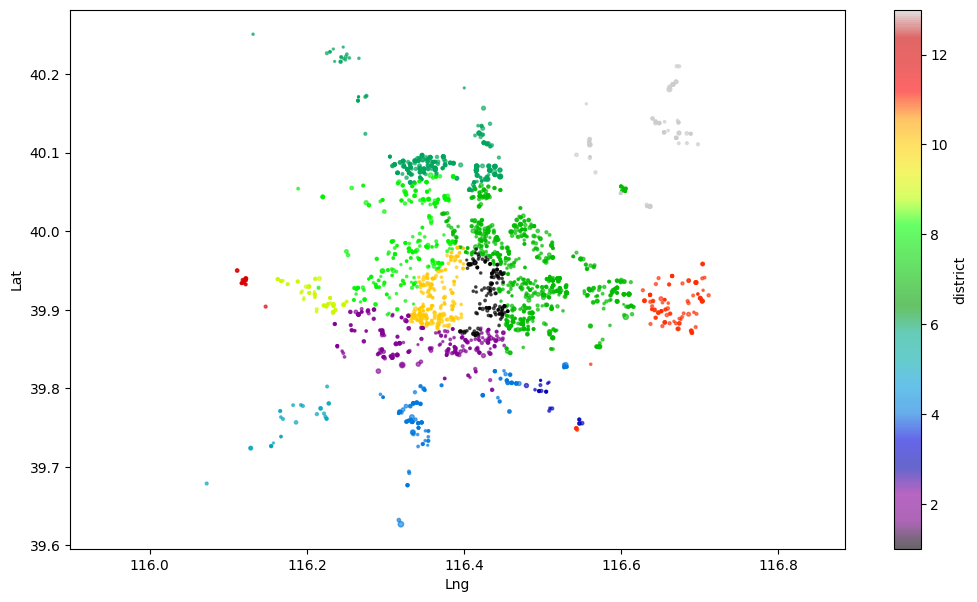

In [35]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(12.5,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax4, kind='scatter', alpha=0.6,
                    c='district', cmap=plt.get_cmap("nipy_spectral"), colorbar=True,s = housing_sample['square'] / 20)

ax4.axis('equal')

<Axes: xlabel='Lng', ylabel='Lat'>

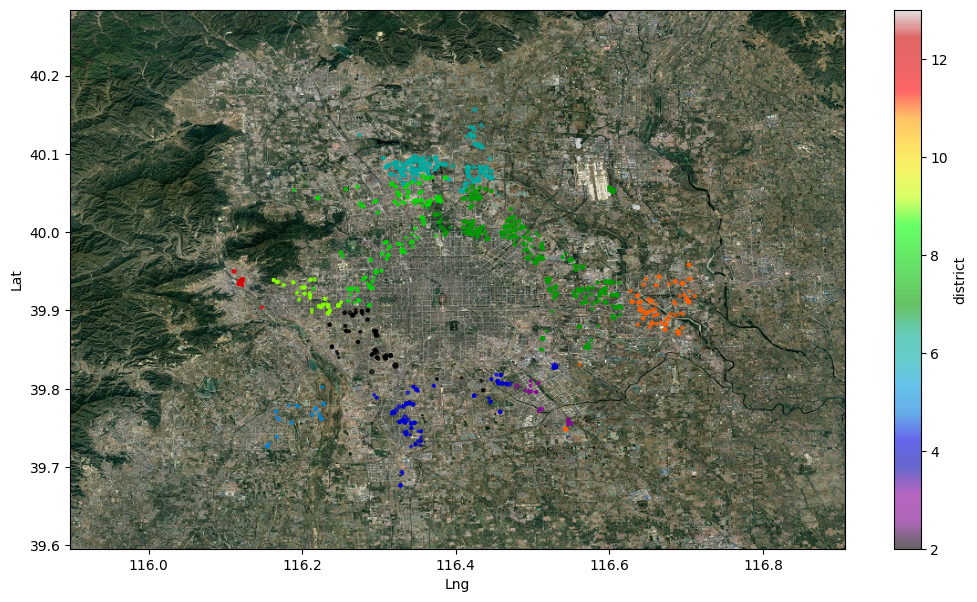

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# فیلتر داده‌ها: فقط خانه‌هایی که فاصله‌شان از مرکز بین ۱۰ و ۳۰ کیلومتر است
filtered_data = housing_sample[(housing_sample["distanceToCapital"] > 10) & 
                               (housing_sample["distanceToCapital"] < 30)]

# بارگذاری تصویر نقشه جدید
beijing_img = mpimg.imread('map2.jpg')

# رسم نمودار
fig5, ax5 = plt.subplots(figsize=(12.5, 7))

ax5.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 
                                39.5957436, 40.2840444], aspect='auto')
filtered_data.plot(kind='scatter',
                   x='Lng',
                   y='Lat',
                   c='district',
                   cmap=plt.get_cmap("nipy_spectral"),
                   s=filtered_data['square'] / 20,
                   alpha=0.6,
                   colorbar=True,
                   ax=ax5)